# COVID-19 in SPAIN

Official Data Source: https://www.mscbs.gob.es/

Official Data in pdf (2020-03-03 to Today):

Official Data in .csv (2020-03-03 to Today):

    1) COVID19_SPA.csv the data correspond to the whole of the Spanish State. 
    2) COVID19_SPA_AC.csv the data has been classified by Autonomous Communities (Regions).

## Dataset Info

Each dataset contains 9 columns: 

* **Region**
* **Date**
* <sup>1</sup> **Total** : Total Confirmed Cases. 
* <sup>2</sup> **AI(14d)** : Accumulated Incidence in the last 14 days.
* <sup>3 </sup><sup>4</sup> **Hospitalized**
* <sup>4</sup> **ICU**
* <sup>3</sup> **Deads** 
* <sup>3</sup> **Recovered** 
* **New** : New Confirmed Cases

<sup>1</sup> The Total Confirmed Cases do not come from the sum of Hospitalized, Recovered and Dead patients, since they are not exclusive.

<sup>2</sup> AI: Accumulated incidence (cases accumulated per 100,000 inhabitants).

<sup>3</sup> Dead and Recovered patients may have been hospitalized and therefore compute in both
groups. 

<sup>4</sup> Patients who have required ICU also compute in patients who have been hospitalized.


In [154]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from IPython.display import display, HTML
style.use('ggplot')

In [155]:
filename='/home/pi/Documents/juno/covid_spa_data/COVID19_SPA'
df_s=pd.read_csv(filepath_or_buffer=filename,parse_dates = True)
df_s.set_index(['Region', 'Date'], inplace=True)
df_s.sort_index(inplace=True)
#display(df_s) #Comment to generate pdf

In [156]:
filename='/home/pi/Documents/juno/covid_spa_data/COVID19_SPA_AC'
df_ac=pd.read_csv(filepath_or_buffer=filename,parse_dates = True)
df_ac.set_index(['Region', 'Date'], inplace=True)
df_ac.sort_index(inplace=True)
display(df_ac) #Comment to generate pdf

Total  AI (14d)  Hospitalized    ICU  Deads  Recovered  \
Region     Date                                                                 
Andalucía  2020-03-03     13      0.15           NaN    NaN    NaN        NaN   
           2020-03-04     13      0.15           NaN    1.0    0.0        NaN   
           2020-03-05     12      0.14           NaN    1.0    0.0        NaN   
           2020-03-06     21      0.25           NaN    1.0    0.0        NaN   
           2020-03-09     54      0.64           NaN    1.0    0.0        NaN   
...                      ...       ...           ...    ...    ...        ...   
País-Vasco 2020-03-25   3271    139.60        1577.0  119.0  155.0      466.0   
           2020-03-26   3946    164.99        1907.0  137.0  180.0      621.0   
           2020-03-27   4601    189.51        2270.0  154.0  207.0      814.0   
           2020-03-28   5136    209.03        2612.0  176.0  221.0     1023.0   
           2020-03-29   5740    231.45        3106.0  271.0  265.0     1503.0   

                         New  
Region     Date               
Andalucía  2020-03-03    NaN  
           2020-03-04    NaN  
           2020-03-05    NaN  
           2020-03-06    NaN  
           2020-03-09    NaN  
...                      ...  
País-Vasco 2020-03-25  543.0  
           2020-03-26  675.0  
           2020-03-27  655.0  
           2020-03-28  535.0  
           2020-03-29  604.0  

[437 rows x 7 columns]

### COVID19 in the Spanish State

Data Visualization of COVID19_SPA.csv

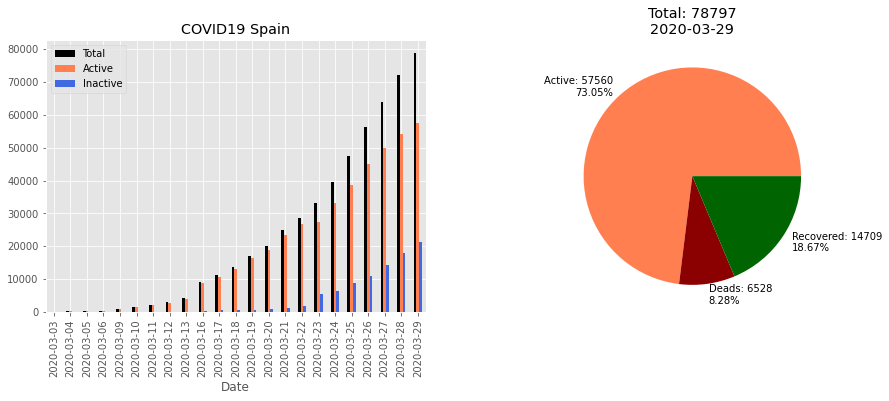

In [193]:
#COVID19 Total-Active-Inactive
df_s['Inactive']=((df_s['Recovered']).fillna(0)+(df_s['Deads']).fillna(0))[0:]
df_s['Active']=((df_s['Total']).fillna(0)-(df_s['Inactive']).fillna(0))[0:]

#COVID19 Today (%)
today=((df_s.reset_index()).loc[[len(df_s)-1]]).reset_index()
#Percentages
tt=today['Active'][0]+today['Deads'][0]+today['Recovered'][0]
ta=round((today['Active'][0]/tt)*100,2)
td=round((today['Deads'][0]/tt)*100,2)
tr=round((today['Recovered'][0]/tt)*100,2)
today_cases=pd.DataFrame({'Total':[today['Active'][0],today['Deads'][0],today['Recovered'][0]]},index=['Active: '+str(int(today['Active'][0]))+'\n'+str(ta)+'%','Deads: '+str(int(today['Deads'][0]))+'\n'+str(td)+'%','Recovered: '+str(int(today['Recovered'][0]))+'\n'+str(tr)+'%'])


#Plotting DataFrame Sub-Plots
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
df_s.fillna(0).reset_index().plot.bar(ax=axes[0],x='Date',y=['Total','Active','Inactive'],color=['k','coral','royalblue'],grid=True)
axes[0].set_title('COVID19 Spain')
today_cases.plot.pie(ax=axes[1],y='Total',colors=['coral','darkred','darkgreen'],legend=False)
axes[1].set_title('Total: '+str(today['Total'][0]) +'\n'+str(today['Date'][0]))
axes[1].set_ylabel(' ')
plt.show()

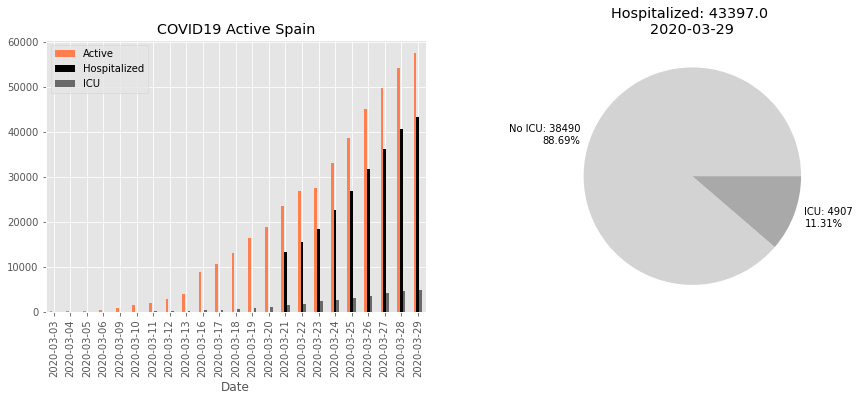

In [158]:
#COVID19 Today (%)
today=((df_s.reset_index()).loc[[len(df_s)-1]]).reset_index()
today['No ICU']=today['Hospitalized'][0]-today['ICU'][0]
#Percentages
tt=today['Hospitalized'][0]
ti=round((today['ICU'][0]/tt)*100,2)
tni=round((today['No ICU'][0]/tt)*100,2)

today_hsp=pd.DataFrame({'Hospitalized':[today['No ICU'][0],today['ICU'][0]]},index=['No ICU: '+str(int(today['No ICU'][0]))+'\n'+str(tni)+'%','ICU: '+str(int(today['ICU'][0]))+'\n'+str(ti)+'%'])

#Plotting DataFrame Sub-Plots
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
df_s.fillna(0).reset_index().plot.bar(ax=axes[0],x='Date',y=['Active','Hospitalized','ICU'],color=['coral','k','dimgray'],grid=True)
axes[0].set_title('COVID19 Active Spain')
today_hsp.plot.pie(ax=axes[1],y='Hospitalized',colors=['lightgray','darkgray'],legend=False)
axes[1].set_title('Hospitalized: '+str(today['Hospitalized'][0])+' \n'+str(today['Date'][0]))
axes[1].set_ylabel(' ')
plt.show()



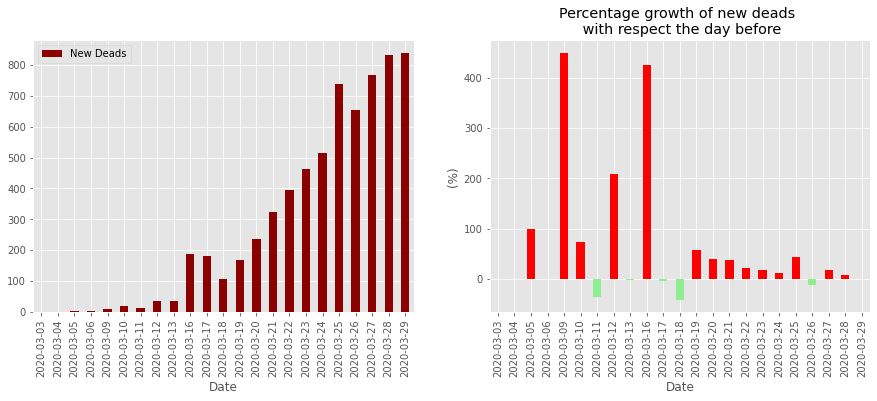

In [159]:
d_1=0
nwd=[]
for d in (df_s['Deads']).fillna(0):
    nwd.append(d-d_1)
    d_1=d
df_s['New Deads']=nwd
g_1=0
gr=[]
for g in df_s['New Deads']:
    if(g_1==0):
        gr.append(0)
    else:
        gr.append(((g-g_1)/g_1)*100)
    g_1=g
df_s['New Deads Growth Rate']=gr    
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
df_s.fillna(0).reset_index().plot.bar(ax=axes[0],x='Date',color='darkred',y=['New Deads'],grid=True)

idf=df_s
idf['sign'] = df_s['New Deads Growth Rate']> 0
(idf.reset_index('Region'))['New Deads Growth Rate'].plot(kind='bar',color=idf.sign.map({True:'red',False:'lightgreen'}))
axes[1].set_ylabel('(%)')
axes[1].set_title('Percentage growth of new deads \n with respect the day before')
plt.show()

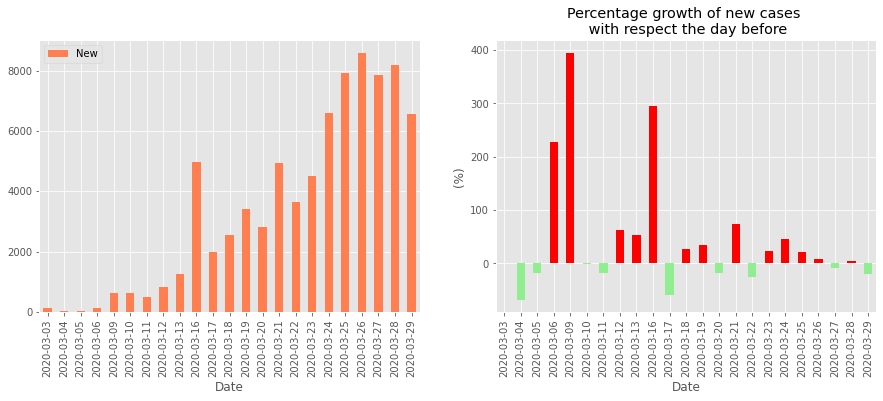

In [160]:
t_1=0
nw=[]
for t in df_s['Total']:
    nw.append(t-t_1)
    t_1=t
df_s['New']=nw
g_1=0
gr=[]
for g in df_s['New']:
    if(g_1==0):
        gr.append(0)
    else:
        gr.append(((g-g_1)/g_1)*100)
    g_1=g
df_s['New Cases Growth Rate']=gr    
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
df_s.fillna(0).reset_index().plot.bar(ax=axes[0],x='Date',color='coral',y=['New'],grid=True)

idf=df_s
idf['sign'] = df_s['New Cases Growth Rate']> 0
(idf.reset_index('Region'))['New Cases Growth Rate'].plot(kind='bar',color=idf.sign.map({True:'red',False:'lightgreen'}))
axes[1].set_ylabel('(%)')
axes[1].set_title('Percentage growth of new cases \n with respect the day before')
plt.show()

### Percentage growth of new cases 
* $i$, day
* $N_i$, new cases on day $i$ 
* Percentage growth of new cases, $\frac{N_{i}-N_{i-1}}{N_{i-1}}100 (\%)$

Notable changes in the percentage growth of reported new cases:
 * 2020-03-06 
    + **+228.2%** more new cases than on 2020-03-05.
 * 2020-03-07  **No Data**.
 * 2020-03-08  **No Data**.
 * 2020-03-09 
    + **+395.3%** more new cases than on 2020-03-06. 
 * 2020-03-16
    + **+295.7%** more new cases than on 2020-03-15.
    + **Lockdown measures are implemented**
    

### COVID19 in the Basque Country
Data Visualization of COVID19_SPA_AC.csv

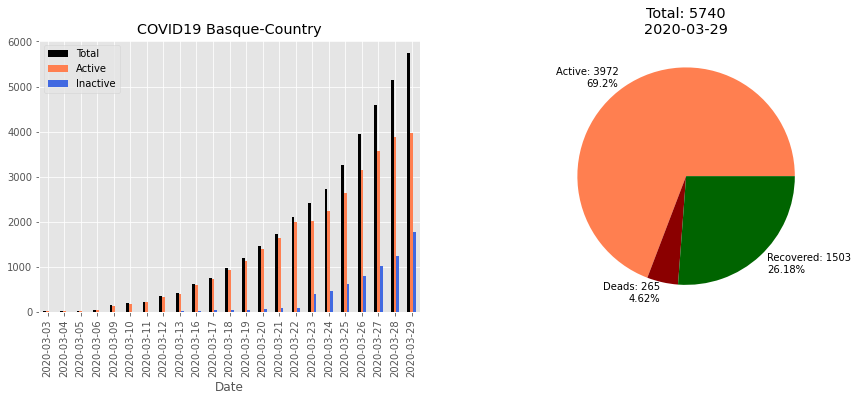

In [192]:
df_eh=(df_ac.loc['País-Vasco',:]).reset_index()
#COVID19 Total-Active-Inactive
df_eh['Inactive']=((df_eh['Recovered']).fillna(0)+(df_eh['Deads']).fillna(0))[0:]
df_eh['Active']=((df_eh['Total']).fillna(0)-(df_eh['Inactive']).fillna(0))[0:]

#COVID19 Today (%)
today=((df_eh.reset_index()).loc[[len(df_eh)-1]]).reset_index()
#Percentages
tt=today['Active'][0]+today['Deads'][0]+today['Recovered'][0]
ta=round((today['Active'][0]/tt)*100,2)
td=round((today['Deads'][0]/tt)*100,2)
tr=round((today['Recovered'][0]/tt)*100,2)
today_cases=pd.DataFrame({'Total':[today['Active'][0],today['Deads'][0],today['Recovered'][0]]},index=['Active: '+str(int(today['Active'][0]))+'\n'+str(ta)+'%','Deads: '+str(int(today['Deads'][0]))+'\n'+str(td)+'%','Recovered: '+str(int(today['Recovered'][0]))+'\n'+str(tr)+'%'])


#Plotting DataFrame Sub-Plots
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
df_eh.fillna(0).reset_index().plot.bar(ax=axes[0],x='Date',y=['Total','Active','Inactive'],color=['k','coral','royalblue'],grid=True)
axes[0].set_title('COVID19 Basque-Country')
today_cases.plot.pie(ax=axes[1],y='Total',colors=['coral','darkred','darkgreen'],legend=False)
axes[1].set_title('Total: '+str(today['Total'][0]) +'\n'+str(today['Date'][0]))
axes[1].set_ylabel(' ')
plt.show()

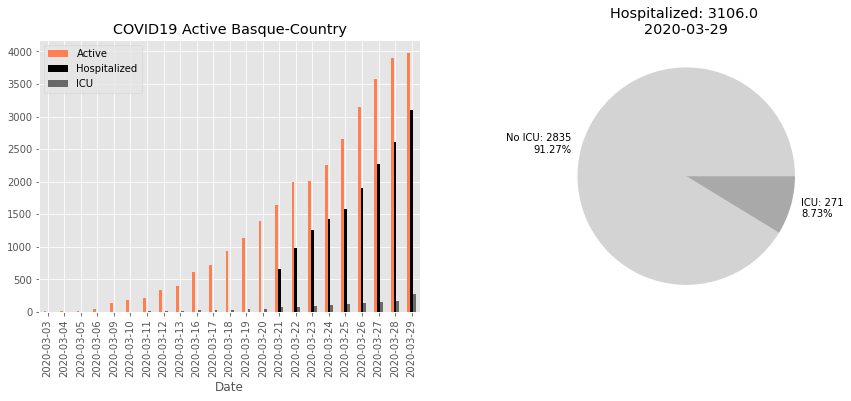

In [162]:
#COVID19 Today (%)
today=((df_eh.reset_index()).loc[[len(df_eh)-1]]).reset_index()
today['No ICU']=today['Hospitalized'][0]-today['ICU'][0]
#Percentages
tt=today['Hospitalized'][0]
ti=round((today['ICU'][0]/tt)*100,2)
tni=round((today['No ICU'][0]/tt)*100,2)

today_hsp=pd.DataFrame({'Hospitalized':[today['No ICU'][0],today['ICU'][0]]},index=['No ICU: '+str(int(today['No ICU'][0]))+'\n'+str(tni)+'%','ICU: '+str(int(today['ICU'][0]))+'\n'+str(ti)+'%'])

#Plotting DataFrame Sub-Plots
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
df_eh.fillna(0).reset_index().plot.bar(ax=axes[0],x='Date',y=['Active','Hospitalized','ICU'],color=['coral','k','dimgray'],grid=True)
axes[0].set_title('COVID19 Active Basque-Country')
today_hsp.plot.pie(ax=axes[1],y='Hospitalized',colors=['lightgray','darkgray'],legend=False)
axes[1].set_title('Hospitalized: '+str(today['Hospitalized'][0])+' \n'+str(today['Date'][0]))
axes[1].set_ylabel(' ')
plt.show()

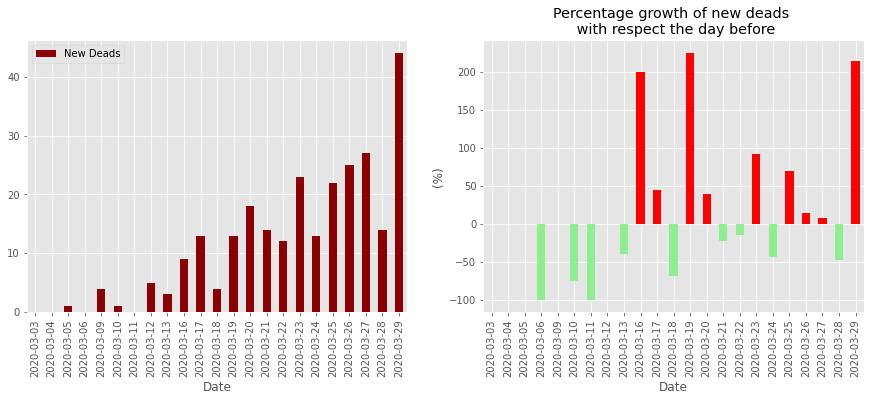

In [163]:
d_1=0
nwd=[]
for d in (df_eh['Deads']).fillna(0):
    nwd.append(d-d_1)
    d_1=d
df_eh['New Deads']=nwd
g_1=0
gr=[]
for g in df_eh['New Deads']:
    if(g_1==0):
        gr.append(0)
    else:
        gr.append(((g-g_1)/g_1)*100)
    g_1=g
df_eh['New Deads Growth Rate']=gr    
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
df_eh.fillna(0).reset_index().plot.bar(ax=axes[0],x='Date',color='darkred',y=['New Deads'],grid=True)

idf=df_eh
idf['sign'] = df_eh['New Deads Growth Rate']> 0
(idf.set_index('Date'))['New Deads Growth Rate'].plot(kind='bar',color=idf.sign.map({True:'red',False:'lightgreen'}))
axes[1].set_ylabel('(%)')
axes[1].set_title('Percentage growth of new deads \n with respect the day before')
plt.show()

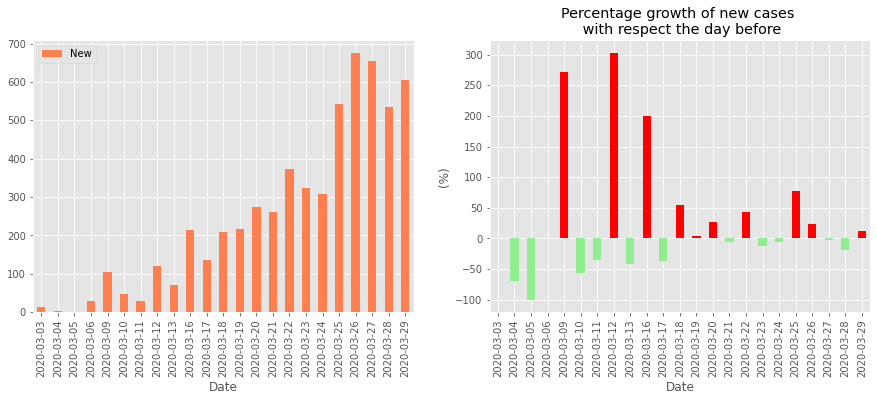

In [164]:
t_1=0
nw=[]
for t in df_eh['Total']:
    nw.append(t-t_1)
    t_1=t
df_eh['New']=nw
g_1=0
gr=[]
for g in df_eh['New']:
    if(g_1==0):
        gr.append(0)
    else:
        gr.append(((g-g_1)/g_1)*100)
    g_1=g
df_eh['New Cases Growth Rate']=gr    
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
df_eh.fillna(0).reset_index().plot.bar(ax=axes[0],x='Date',color='coral',y=['New'],grid=True)

idf=df_eh
idf['sign'] = df_eh['New Cases Growth Rate']> 0
(idf.set_index('Date'))['New Cases Growth Rate'].plot(kind='bar',color=idf.sign.map({True:'red',False:'lightgreen'}))
axes[1].set_ylabel('(%)')
axes[1].set_title('Percentage growth of new cases \n with respect the day before')
plt.show()

### COVID19 compare regions 

Autonomous Communities:

['Andalucía', 'Aragón', 'Asturias', 'Baleares', 'Canarias', 'Cantabria', 'Castilla-La-Mancha', 'Castilla-y-León', 'Cataluña', 'Ceuta', 'C-Valenciana', 'Extremadura', 'Galicia', 'Madrid', 'Melilla', 'Murcia', 'Navarra', 'País-Vasco', 'La-Rioja']

In [229]:
##Selected regions
#rg=['País-Vasco','Navarra','Cantabria']#'Cataluña','Madrid'
##rg=['Andalucía', 'Aragón', 'Asturias', 'Baleares', 'Canarias', 'Cantabria', 'Castilla-La-Mancha', 'Castilla-y-León', 'Cataluña', 'Ceuta', 'C-Valenciana', 'Extremadura', 'Galicia', 'Madrid', 'Melilla', 'Murcia', 'Navarra', 'País-Vasco', 'La-Rioja']
##COVID19 Total-Active-Inactive
#df_ac['Inactive']=((df_ac['Recovered']).fillna(0)+(df_ac['Deads']).fillna(0))[0:]
#df_ac['Active']=((df_ac['Total']).fillna(0)-(df_ac['Inactive']).fillna(0))[0:]
#df_ac['P Recovered in Total']=(((df_ac['Recovered']).fillna(0)/df_ac['Total'])*100).fillna(0)
#df_ac['P Deads in Total']=(((df_ac['Deads']).fillna(0)/df_ac['Total'])*100).fillna(0)

##Plotting DataFrame Sub-Plots
#fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
#(df_ac.loc[rg,:]).reset_index().pivot('Date','Region','Active').plot(ax=axes[0])
#axes[0].tick_params(axis='x', rotation=45)
#axes[0].set_title('COVID19 Active')
#axes[0].set_xlabel(' ')

##(df_ac.loc[rg,:]).reset_index().pivot('Date','Region','Deads').plot(ax=axes[1])
##axes[1].tick_params(axis='x', rotation=45)
##axes[1].set_title('COVID19 Deads')
#(df_ac.loc[rg,:]).reset_index().pivot('Date','Region','P Recovered in Total').plot(ax=axes[1])
#axes[1].tick_params(axis='x', rotation=45)
#axes[1].set_title('% of Recovered over Total Cases\n in the region')
#axes[1].set_xlabel(' ')

#(df_ac.loc[rg,:]).reset_index().pivot('Date','Region','P Deads in Total').plot(ax=axes[2])
#axes[2].tick_params(axis='x', rotation=45)
#axes[2].set_title('% of Deads from Total Cases\n in the region')
#axes[2].set_xlabel(' ')
#plt.show()

In an attend to stop COVID19, **loockdown** measures were stablished the 2020-3-14. Since then, COVID19 is hitting the society and its **Universal Health-Care System** severelly.
The Political-&-Administrative model in Spain delegates to the Autonomous Communities the management of the Health-Care System in each region. Thus, analysing and comparing the progress of the COVID19 pandemia by Autonomous Communities makes sense.

* The **% of Inactive Cases over Total Cases in the region** gives a measure about **how close** an Autonomous Community is to defeat COVID19. While **high** percentages indicate that the Autonomous Communities are about to end with COVID19, **low** percentages show the opposite. In any case, this values are only a *proximity* indicator towards the end of the COVID19 crisis and **can not be used to state how well Autonomous Communities Health-Care Systems are dealing with the infected population**.


* The **% of Recovered&Deads over Inactive Cases in the region** shows a picture of the Recovered-Dead ratio over Inactive cases at the present moment. This values must be treated just as "objetive-data" and **can not be used to compare how well or how badly Autonomous Communities Health-Care Systems are dealing with the infected population** since the scope of COVID19-Scenario differs in a large amount from region to region.


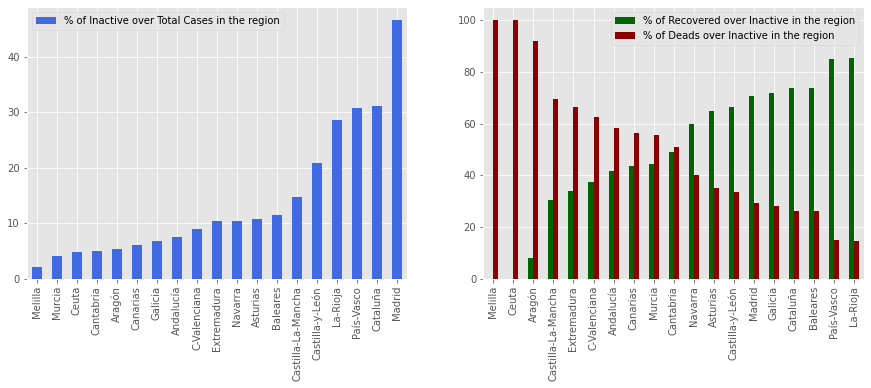

In [231]:
#Get Today Data
idf=df_ac.reset_index()
dates=[]
for date in idf['Date']:
    dates.append(date)
idf.set_index(['Date'], inplace=True)
idf.sort_index(inplace=True)
##dataFrame.loc[<ROWS RANGE> , <COLUMNS RANGE>]
today=idf.loc[dates[len(dates)-1],:]
today=today.reset_index('Date')

#Data to be ploted

today['% of Inactive over Total Cases in the region']=((today['Inactive']/today['Total'])*100)
today['% of Recovered over Inactive in the region']=(((today['Recovered']).fillna(0)/today['Inactive'])*100).fillna(0)
today['% of Deads over Inactive in the region']=(((today['Deads']).fillna(0)/today['Inactive'])*100).fillna(0)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
today=today.sort_values(by='% of Inactive over Total Cases in the region')
today.plot.bar(ax=axes[0],x='Region',y=['% of Inactive over Total Cases in the region'],color=['royalblue'],grid=True)
axes[0].set_xlabel('')
axes[0].set_ylabel('')

today=today.sort_values(by='% of Recovered over Inactive in the region')
today.plot.bar(ax=axes[1],x='Region',y=['% of Recovered over Inactive in the region','% of Deads over Inactive in the region'],color=['darkgreen','darkred'],grid=True)
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.show()